In [42]:
from connection import MySQLConnection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Data overview

new_connection = MySQLConnection()
 # SQL query to show number of restaurants, number of inspections and violation types by boro after 1.1.2018
q1 = ( '''SELECT count( DISTINCT DBA) as `NUMBER OF RESTAURANTS`, 
       count(DBA) as `NUMBER OF INSPECTIONS`, 
       count(DISTINCT CUISINE_DESCRIPTION) as `NUMBER OF CUISINES`,
       count(DISTINCT VIOLATION_CODE) as `NUMBER OF VIOLATION TYPES`,
       BORO
FROM nyc_restaurants.clean_data
GROUP BY BORO'''
      )

# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(q1,  new_connection.con)
r1

,NUMBER OF RESTAURANTS,NUMBER OF INSPECTIONS,NUMBER OF CUISINES,NUMBER OF VIOLATION TYPES,BORO
0,1747,12496,49,54,Bronx
1,5026,32071,79,60,Brooklyn
2,7302,49087,83,65,Manhattan
3,4540,30659,77,60,Queens
4,721,4357,51,50,Staten Island


In [33]:
 # SQL query
import warnings
warnings.filterwarnings('ignore')
top_cuisine_manhattan = ( '''SELECT count(DISTINCT DBA) as `NUMBER OF RESTAURANTS IN MANHATTAN`, CUISINE_DESCRIPTION FROM nyc_restaurants.clean_data WHERE BORO = "Manhattan" GROUP BY CUISINE_DESCRIPTION ORDER BY `NUMBER OF RESTAURANTS IN MANHATTAN` desc LIMIT 5''' )
top_cuisine_bronx = ( '''SELECT count(DISTINCT DBA) as `NUMBER OF RESTAURANTS IN BRONX`, CUISINE_DESCRIPTION FROM nyc_restaurants.clean_data WHERE BORO = "Bronx" GROUP BY CUISINE_DESCRIPTION ORDER BY `NUMBER OF RESTAURANTS IN BRONX` desc LIMIT 5''' )
top_cuisine_si = ( '''SELECT count(DISTINCT DBA) as `NUMBER OF RESTAURANTS IN STATEN ISLAND`, CUISINE_DESCRIPTION FROM nyc_restaurants.clean_data WHERE BORO = "Staten Island" GROUP BY CUISINE_DESCRIPTION ORDER BY `NUMBER OF RESTAURANTS IN STATEN ISLAND` DESC LIMIT 5''' )
top_cuisine_brooklyn = ( '''SELECT count(DISTINCT DBA) as `NUMBER OF RESTAURANTS IN BROOKLYN`, CUISINE_DESCRIPTION FROM nyc_restaurants.clean_data WHERE BORO = "Brooklyn" GROUP BY CUISINE_DESCRIPTION ORDER BY `NUMBER OF RESTAURANTS IN BROOKLYN` DESC LIMIT 5''' )
top_cuisine_queens = ( '''SELECT count(DISTINCT DBA) as `NUMBER OF RESTAURANTS IN QUEENS`, CUISINE_DESCRIPTION FROM nyc_restaurants.clean_data WHERE BORO = "Queens" GROUP BY CUISINE_DESCRIPTION ORDER BY `NUMBER OF RESTAURANTS IN QUEENS` DESC LIMIT 5''' )

# Convert the SQL query to Pandas data Frame
tc_m  = pd.read_sql(top_cuisine_manhattan,  new_connection.con)
tc_bx = pd.read_sql(top_cuisine_bronx,  new_connection.con)
tc_si = pd.read_sql(top_cuisine_si,  new_connection.con)
tc_b  = pd.read_sql(top_cuisine_brooklyn,  new_connection.con)
tc_q  = pd.read_sql(top_cuisine_queens,  new_connection.con)
tc_m

,NUMBER OF RESTAURANTS IN MANHATTAN,CUISINE_DESCRIPTION
0,2191,American
1,536,Coffee/Tea
2,496,Italian
3,424,Chinese
4,399,Japanese


In [18]:
tc_bx

,NUMBER OF RESTAURANTS IN BRONX,CUISINE_DESCRIPTION
0,288,American
1,243,Chinese
2,187,Pizza
3,174,Latin American
4,108,Spanish


In [20]:
tc_si

,NUMBER OF RESTAURANTS IN STATEN ISLAND,CUISINE_DESCRIPTION
0,156,American
1,96,Pizza
2,75,Chinese
3,66,Italian
4,40,Mexican


In [21]:
tc_b

,NUMBER OF RESTAURANTS IN BROOKLYN,CUISINE_DESCRIPTION
0,966,American
1,580,Chinese
2,360,Coffee/Tea
3,321,Pizza
4,273,Caribbean


In [22]:
tc_q

,NUMBER OF RESTAURANTS IN QUEENS,CUISINE_DESCRIPTION
0,762,American
1,635,Chinese
2,289,Latin American
3,269,Pizza
4,209,Coffee/Tea


In [36]:
 # SQL query to show overall number of restaurants in all 5 boroughs per cuisine type
number_of_restuarants_per_cuisines = ( '''SELECT count(DISTINCT DBA) as `NUMBER OF RESTAURANTS`, CUISINE_DESCRIPTION FROM nyc_restaurants.clean_data GROUP BY CUISINE_DESCRIPTION ORDER BY `NUMBER OF RESTAURANTS` DESC LIMIT 10''' )

# Convert the SQL query to Pandas data Frame
restaurants_cuisine = pd.read_sql(number_of_restuarants_per_cuisines,  new_connection.con)
restaurants_cuisine

,NUMBER OF RESTAURANTS,CUISINE_DESCRIPTION
0,4277,American
1,1858,Chinese
2,1132,Pizza
3,1114,Coffee/Tea
4,856,Italian
5,743,Japanese
6,731,Latin American
7,706,Mexican
8,618,Bakery Products/Desserts
9,578,Caribbean


In [38]:
 # SQL query to show what is the borough with the best average health score over years
avg_health_score_per_borough = ( '''SELECT AVG( WEIGHED_SCORE ) AS SCORE, BORO FROM nyc_restaurants.clean_data group by BORO order by SCORE DESC''' )
import warnings
warnings.filterwarnings('ignore')
# Convert the SQL query to Pandas data Frame
score_boro = pd.read_sql(avg_health_score_per_borough,  new_connection.con)
score_boro

,SCORE,BORO
0,87.8267,Staten Island
1,87.0748,Manhattan
2,86.9848,Brooklyn
3,86.5773,Bronx
4,86.5342,Queens


Text(0, 0.5, 'NUMBER_OF_INSPECTIONS')

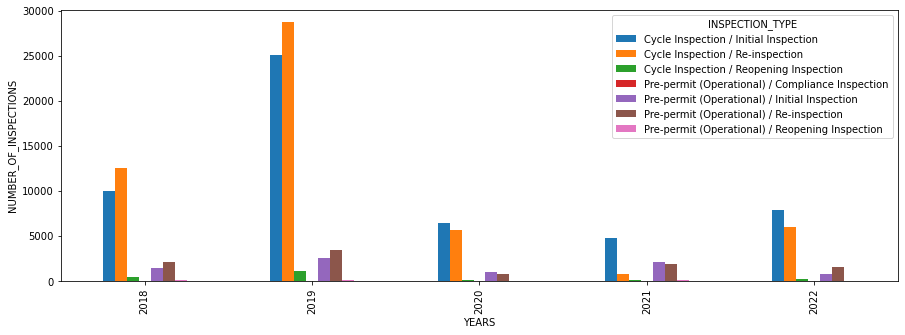

In [48]:
# Show number of inspection based on inspection type over years

q = ('''SELECT INSPECTION_TYPE , count(DBA) as NUMBER_OF_INSPECTIONS, EXTRACT(year FROM INSPECTION_DATE) AS YEARS FROM nyc_restaurants.clean_data  group by YEARS, INSPECTION_TYPE''')

# Convert the SQL query to Pandas DataFrame
r = pd.read_sql(q,  new_connection.con)


# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(15,5)

# Change the axes labels
ax.set_xlabel("YEARS")
ax.set_ylabel("NUMBER_OF_INSPECTIONS")